In [2]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/sherli001/.conda/envs/singlecell/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] hgu219.db_3.2.3       org.Hs.eg.db_3.14.0   forcats_0.5.2        
 [4] stringr_1.5.0         dplyr_1.1.0           purrr_1.0.1          
 [7] readr_2.1.3           tidyr_1.3.0           tibble_3.1.7         
[10] ggplot2_3.3.6         tidyverse_1.3.2       AnnotationDbi_1.56.2 


In [1]:
library(WGCNA)
library(AnnotationDbi)
library(tidyverse)
library(ggplot2)
options(stringsAsFactors = FALSE)

library(hgu219.db)

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor


Warning message:
“package ‘AnnotationDbi’ was built under R version 4.1.3”
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


In [3]:
load(file = "./pairwise_RData_files/pairwise_WGCNA_ADNI_allSubjects-01-dataInput.RData")
load(file = "./pairwise_RData_files/20230418_CN_AD_limmaCorrected-02-networkConstruction-stepByStep.RData")
load(file = "./pairwise_RData_files/datExpr_CN_AD_limmaCorrected_selectHVGs.RData")

In [4]:
ls()

[1] "datExpr_CN_AD_selectHVGs"            "datExpr_CN_AD.gender_rin_corrected" 
 [3] "datExpr_CN_MCI.gender_rin_corrected" "datExpr_MCI_AD.gender_rin_corrected"
 [5] "datTraits_CN_AD"                     "datTraits_CN_MCI"                   
 [7] "datTraits_MCI_AD"                    "geneTree_CN_AD"                     
 [9] "MEs_CN_AD"                           "moduleColors_CN_AD"                 
[11] "moduleLabels_CN_AD"

## Quantifying module-trait associations

In [5]:
# Define numbers of genes and samples
nGenes_CN_AD <- ncol(datExpr_CN_AD_selectHVGs)
nSamples_CN_AD <- nrow(datExpr_CN_AD_selectHVGs)

# Recalculate MEs with color labels
MEs0_CN_AD = moduleEigengenes(datExpr_CN_AD_selectHVGs, moduleColors_CN_AD)$eigengenes
MEs_CN_AD = orderMEs(MEs0_CN_AD)
moduleTraitCor_CN_AD = cor(MEs_CN_AD, datTraits_CN_AD, use = "p");
moduleTraitPvalue_CN_AD = corPvalueStudent(moduleTraitCor_CN_AD, nSamples_CN_AD);

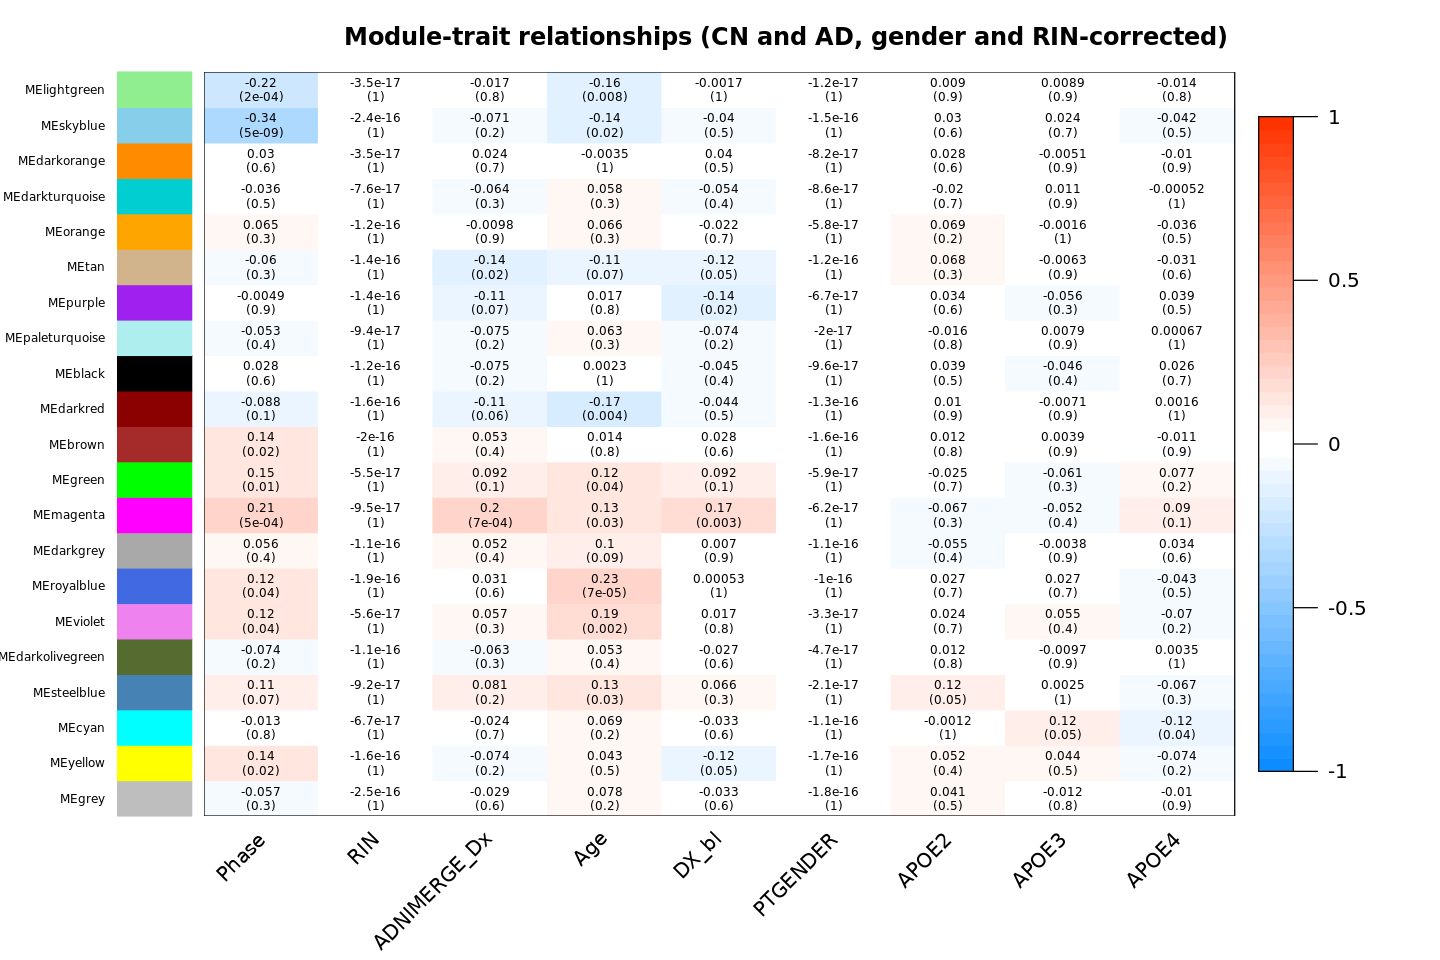

In [6]:
# sizeGrWindow(12,9)
options(repr.plot.width = 12, repr.plot.height = 8)
# Will display correlations and their p-values
textMatrix_CN_AD = paste(signif(moduleTraitCor_CN_AD, 2), "\n(",
                                        signif(moduleTraitPvalue_CN_AD, 1), ")", sep = "");
dim(textMatrix_CN_AD) = dim(moduleTraitCor_CN_AD)
par(mar = c(6, 8.5, 3, 3));
# Display the correlation values within a heatmap plot
labeledHeatmap(Matrix = moduleTraitCor_CN_AD,
               xLabels = names(datTraits_CN_AD),
               yLabels = names(MEs_CN_AD),
               ySymbols = names(MEs_CN_AD),
               colorLabels = FALSE,
               colors = blueWhiteRed(50),
               textMatrix = textMatrix_CN_AD,
               setStdMargins = FALSE,
               cex.text = 0.6,
               cex.lab.y = 0.6,
               zlim = c(-1,1),
               main = paste("Module-trait relationships (CN and AD, gender and RIN-corrected)"))

In [7]:
pdf(file = "pairwise_plots/CN_AD_moduleTraitCor.pdf", 
    width = 12, height = 9)

textMatrix_CN_AD = paste(signif(moduleTraitCor_CN_AD, 2), "\n(",
                                        signif(moduleTraitPvalue_CN_AD, 1), ")", sep = "");
dim(textMatrix_CN_AD) = dim(moduleTraitCor_CN_AD)
par(mar = c(6, 8.5, 3, 3));
# Display the correlation values within a heatmap plot
labeledHeatmap(Matrix = moduleTraitCor_CN_AD,
               xLabels = names(datTraits_CN_AD),
               yLabels = names(MEs_CN_AD),
               ySymbols = names(MEs_CN_AD),
               colorLabels = FALSE,
               colors = blueWhiteRed(50),
               textMatrix = textMatrix_CN_AD,
               setStdMargins = FALSE,
               cex.text = 0.6,
               cex.lab.y = 0.6,
               zlim = c(-1,1),
               main = paste("Module-trait relationships (CN and AD, gender and RIN-corrected)"))

dev.off()

png 
  2

## Gene relationship to trait and important modules

In [8]:
# Define variable diagnosis containing diagnosis column of datTrait
diagnosis  <- as.data.frame(datTraits_CN_AD$ADNIMERGE_Dx)
names(diagnosis) <- "diagnosis"

In [9]:
# names (colors) of the modules
modNames_CN_AD = substring(names(MEs_CN_AD), 3)
modNames_CN_AD

[1] "lightgreen"     "skyblue"        "darkorange"     "darkturquoise" 
 [5] "orange"         "tan"            "purple"         "paleturquoise" 
 [9] "black"          "darkred"        "brown"          "green"         
[13] "magenta"        "darkgrey"       "royalblue"      "violet"        
[17] "darkolivegreen" "steelblue"      "cyan"           "yellow"        
[21] "grey"

In [10]:
geneModuleMembership_CN_AD <- as.data.frame(cor(datExpr_CN_AD_selectHVGs, 
                                                MEs_CN_AD, use = "p"))
MMPvalue_CN_AD <- as.data.frame(corPvalueStudent(as.matrix(geneModuleMembership_CN_AD), 
                                                 nSamples_CN_AD))

names(geneModuleMembership_CN_AD) = paste("MM", modNames_CN_AD, sep="");
names(MMPvalue_CN_AD) = paste("p.MM", modNames_CN_AD, sep="");

In [11]:
geneTraitSignificance_CN_AD.diagnosis = as.data.frame(cor(datExpr_CN_AD_selectHVGs, diagnosis, use = "p"));

GSPvalue_CN_AD.diagnosis = as.data.frame(
    corPvalueStudent(as.matrix(geneTraitSignificance_CN_AD.diagnosis), nSamples_CN_AD));

names(geneTraitSignificance_CN_AD.diagnosis) = paste("GS.", names(diagnosis), sep="");
names(GSPvalue_CN_AD.diagnosis) = paste("p.GS.", names(diagnosis), sep="");

In [12]:
# convert probe names to gene symbols
vector_datExpr_CN_AD_geneSymbols <- rep(0, length = ncol(datExpr_CN_AD_selectHVGs))

vector_datExpr_CN_AD_geneSymbols <- AnnotationDbi::mapIds(hgu219.db,
                                                          keys = datExpr_CN_AD_selectHVGs %>% colnames,
                                                          column = "SYMBOL",
                                                          keytype = "PROBEID",
                                                          multiVals = "first")

'select()' returned 1:many mapping between keys and columns



In [13]:
df_datExpr_CN_AD_geneSymbols <- data.frame(vector_datExpr_CN_AD_geneSymbols)
colnames(df_datExpr_CN_AD_geneSymbols) <- c("geneSymbol")

df_datExpr_CN_AD_geneSymbols %>% head

,geneSymbol
,<chr>
11756083_x_at,HLA-DQA1
11732801_at,SIRPB1
11755998_x_at,HLA-DRB4
11760799_x_at,HLA-DPB1
11732800_a_at,SIRPB1
11752660_a_at,SIRPB1


In [14]:
# Create the starting data frame
geneInfo0_CN_AD_diagnosis = data.frame(geneProbe = rownames(df_datExpr_CN_AD_geneSymbols),
                                       geneSymbol = df_datExpr_CN_AD_geneSymbols$geneSymbol,
                                       moduleColor = moduleColors_CN_AD,
                                       geneTraitSignificance_CN_AD.diagnosis,
                                       GSPvalue_CN_AD.diagnosis)

# Order modules by their significance for weight
modOrder_CN_AD_diagnosis = order(-abs(cor(MEs_CN_AD, diagnosis, use = "p")));
# Add module membership information in the chosen order
for (mod in 1:ncol(geneModuleMembership_CN_AD))
{
    oldNames_diagnosis = names(geneInfo0_CN_AD_diagnosis)
    geneInfo0_CN_AD_diagnosis = data.frame(geneInfo0_CN_AD_diagnosis, geneModuleMembership_CN_AD[, modOrder_CN_AD_diagnosis[mod]],
                                     MMPvalue_CN_AD[, modOrder_CN_AD_diagnosis[mod]]);
    names(geneInfo0_CN_AD_diagnosis) = c(oldNames_diagnosis, paste("MM.", modNames_CN_AD[modOrder_CN_AD_diagnosis[mod]], sep=""),
                                   paste("p.MM.", modNames_CN_AD[modOrder_CN_AD_diagnosis[mod]], sep=""))
}
# Order the genes in the geneInfo variable first by module color, then by geneTraitSignificance
geneOrder_CN_AD_diagnosis = order(geneInfo0_CN_AD_diagnosis$moduleColor, -abs(geneInfo0_CN_AD_diagnosis$GS.diagnosis));
geneInfo_CN_AD_diagnosis = geneInfo0_CN_AD_diagnosis[geneOrder_CN_AD_diagnosis, ]

In [15]:
geneInfo_CN_AD_diagnosis %>% head

,geneProbe,geneSymbol,moduleColor,GS.diagnosis,p.GS.diagnosis,MM.magenta,p.MM.magenta,MM.tan,p.MM.tan,MM.darkred,⋯,MM.grey,p.MM.grey,MM.darkorange,p.MM.darkorange,MM.cyan,p.MM.cyan,MM.lightgreen,p.MM.lightgreen,MM.orange,p.MM.orange
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11741472_a_at,11741472_a_at,RAB11FIP3,black,-0.2064756,0.000483761,-0.4192065,1.986211e-13,0.1585110,7.655220e-03,0.4729543,⋯,0.19701315,8.798222e-04,-0.01034965,0.862625586,0.01816130,0.761394229,-0.1197206,4.456348e-02,-0.010168475,0.865007250
11739739_a_at,11739739_a_at,IL21R,black,-0.1858100,0.001725845,-0.4104028,6.970485e-13,0.4074090,1.059423e-12,0.5359647,⋯,0.02909329,6.266181e-01,0.19247099,0.001161358,-0.08279077,0.165594405,-0.2952313,4.447355e-07,0.102693617,0.085175872
11755811_a_at,11755811_a_at,ZNF266,black,-0.1836900,0.001952425,-0.3501558,1.480299e-09,0.2721864,3.511960e-06,0.4841278,⋯,0.05792547,3.324317e-01,0.02453619,0.681612010,-0.17658079,0.002924721,-0.1320969,2.654387e-02,0.164588773,0.005596027
11743698_at,11743698_at,EDEM3,black,0.1817669,0.002181115,0.1910809,1.262808e-03,-0.2436169,3.544529e-05,-0.4053183,⋯,-0.12100483,4.231002e-02,-0.08714625,0.144369030,-0.15188826,0.010644914,0.5845552,3.069942e-27,-0.152232840,0.010467001
11757995_s_at,11757995_s_at,EDEM3,black,0.1725918,0.003645821,0.2413516,4.209152e-05,-0.1777509,2.739253e-03,-0.3647709,⋯,-0.08550800,1.520953e-01,-0.07180670,0.229349662,-0.17063800,0.004054651,0.5206244,5.433842e-21,-0.076746814,0.198802880
11757672_s_at,11757672_s_at,MRPS17,black,-0.1646054,0.005591143,-0.3985365,3.575457e-12,0.1393163,1.925527e-02,0.3427169,⋯,0.24014355,4.610034e-05,0.17535281,0.003131549,-0.10929683,0.066840083,-0.1379897,2.044670e-02,-0.006156457,0.918021490


In [16]:
write.csv(geneInfo_CN_AD_diagnosis, file = "pairwise_csv_files/geneInfo_CN_AD.csv")

In [17]:
entrezCodes_CN_AD <- AnnotationDbi::mapIds(hgu219.db,
                                           keys = datExpr_CN_AD_selectHVGs %>% colnames,
                                           column = "ENTREZID",
                                           keytype = "PROBEID",
                                           multiVals = "first")

'select()' returned 1:many mapping between keys and columns



In [18]:
GOenr_CN_AD_diagnosis = GOenrichmentAnalysis(moduleColors_CN_AD, entrezCodes_CN_AD, organism = "human", nBestP = 10);

Warning message in GOenrichmentAnalysis(moduleColors_CN_AD, entrezCodes_CN_AD, organism = "human", :
“This function is deprecated and will be removed in the near future. 
We suggest using the replacement function enrichmentAnalysis 
in R package anRichment, available from the following URL:
https://labs.genetics.ucla.edu/horvath/htdocs/CoexpressionNetwork/GeneAnnotation/”
Loading required package: GO.db



 GOenrichmentAnalysis: loading annotation data...
  ..of the 10088  Entrez identifiers submitted, 9788 are mapped in current GO categories.
  ..will use 9788 background genes for enrichment calculations.
  ..preparing term lists (this may take a while).. 
  ..working on label set 1 ..
    ..calculating enrichments (this may also take a while)..
    ..putting together terms with highest enrichment significance..


In [19]:
tab_CN_AD_diagnosis = GOenr_CN_AD_diagnosis$bestPTerms[[4]]$enrichment

In [20]:
tab_CN_AD_diagnosis %>% head

,module,modSize,bkgrModSize,rank,enrichmentP,BonferoniP,nModGenesInTerm,fracOfBkgrModSize,fracOfBkgrTermSize,bkgrTermSize,termID,termOntology,termName,termDefinition
,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
GO:0034470,black,453,438,1,4.883522e-06,0.09079933,28,0.063926941,0.1138211,246,GO:0034470,BP,ncRNA processing,Any process that results in the conversion of one or more primary non-coding RNA (ncRNA) transcripts into one or more mature ncRNA molecules.
GO:0106074,black,453,438,2,5.522716e-05,1.00000000,4,0.009132420,0.6666667,6,GO:0106074,BP,aminoacyl-tRNA metabolism involved in translational fidelity,"Any process which detects an amino-acid acetylated tRNA is charged with the correct amino acid, or removes incorrect amino acids from a charged tRNA. This process can be performed by tRNA synthases, or by subsequent reactions after tRNA aminoacylation."
GO:0002161,black,453,438,3,5.522716e-05,1.00000000,4,0.009132420,0.6666667,6,GO:0002161,MF,aminoacyl-tRNA editing activity,The hydrolysis of an incorrectly aminoacylated tRNA.
GO:0006399,black,453,438,4,3.104400e-04,1.00000000,14,0.031963470,0.1296296,108,GO:0006399,BP,tRNA metabolic process,"The chemical reactions and pathways involving tRNA, transfer RNA, a class of relatively small RNA molecules responsible for mediating the insertion of amino acids into the sequence of nascent polypeptide chains during protein synthesis. Transfer RNA is characterized by the presence of many unusual minor bases, the function of which has not been completely established."
GO:1990164,black,453,438,5,3.442121e-04,1.00000000,3,0.006849315,0.7500000,4,GO:1990164,BP,histone H2A phosphorylation,NA
GO:0006450,black,453,438,6,4.164542e-04,1.00000000,4,0.009132420,0.4444444,9,GO:0006450,BP,regulation of translational fidelity,Any process that modulates the ability of the translational apparatus to interpret the genetic code.


In [22]:
write.table(tab_CN_AD_diagnosis, file = "pairwise_csv_files/GOEnrichmentTable_CN_AD.csv", sep = ",", quote = TRUE, row.names = FALSE)